In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# File paths
path_ali = r"C:\Users\Dell\Downloads\Antarctica Global\Assignment\Dataset\Data_Assignment_Ali.csv"
path_arya = r"C:\Users\Dell\Downloads\Antarctica Global\Assignment\Dataset\Data_Assignment_Arya.csv"
path_raj = r"C:\Users\Dell\Downloads\Antarctica Global\Assignment\Dataset\Data_Assignment_Raj.csv"

# Load CSV files
ali_df = pd.read_csv(path_ali)
arya_df = pd.read_csv(path_arya)
raj_df = pd.read_csv(path_raj)


In [3]:
# creating new column name Employee 
ali_df['Employee'] = 'Ali'
arya_df['Employee'] = 'Arya'
raj_df['Employee'] = 'Raj'

In [31]:
# Combine into one dataframe for unified analysis
df = pd.concat([ali_df, arya_df, raj_df], ignore_index=True)
output_path = r'C:\Users\Dell\Downloads\Antarctica Global\Assignment\Dataset\merged_dataset.xlsx'
df.to_excel(output_path, index=False)
print("File saved successfully at:", output_path)


File saved successfully at: C:\Users\Dell\Downloads\Antarctica Global\Assignment\Dataset\merged_dataset.xlsx


In [5]:
# Preview first few rows
df.head()


,Day,Date,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),Daily Team Review,No. of Incomplete Leads,Employee
0,Mon,12/06/2023,5.0,135.0,27.0,Attended,0.0,Ali
1,Tue,13/06/2023,9.0,210.0,23.0,Attended,3.0,Ali
2,Wed,14/06/2023,13.0,300.0,23.0,Attended,0.0,Ali
3,Thu,15/06/2023,9.0,360.0,40.0,Attended,0.0,Ali
4,Fri,16/06/2023,11.0,300.0,27.0,Attended,0.0,Ali


In [84]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Day                       183 non-null    object        
 1   Date                      183 non-null    datetime64[ns]
 2   Leads                     183 non-null    int64         
 3   Time spent on LG (mins)   183 non-null    int64         
 4   Avg Time Per Lead (mins)  183 non-null    int64         
 5   Daily Team Review         125 non-null    object        
 6   No. of Incomplete Leads   183 non-null    int64         
 7   Employee                  183 non-null    object        
 8   Active_Status             183 non-null    object        
 9   Days Since Start          183 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 14.4+ KB


In [30]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # Assuming format is DD-MM-YYYY


File saved successfully at: C:\Users\Dell\Downloads\Antarctica Global\Assignment\Dataset\merged_dataset.xlsx


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Day                       183 non-null    object        
 1   Date                      183 non-null    datetime64[ns]
 2   Leads                     123 non-null    float64       
 3   Time spent on LG (mins)   123 non-null    float64       
 4   Avg Time Per Lead (mins)  123 non-null    float64       
 5   Daily Team Review         124 non-null    object        
 6   No. of Incomplete Leads   124 non-null    float64       
 7   Employee                  183 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 11.6+ KB


In [11]:
# checking missing values
df.isnull().sum()


Day                          0
Date                         0
Leads                       60
Time spent on LG (mins)     60
Avg Time Per Lead (mins)    60
Daily Team Review           59
No. of Incomplete Leads     59
Employee                     0
dtype: int64

In [33]:
df.head(10)


,Day,Date,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),Daily Team Review,No. of Incomplete Leads,Employee
0,Mon,12/06/2023,5.0,135.0,27.0,Attended,0.0,Ali
1,Tue,13/06/2023,9.0,210.0,23.0,Attended,3.0,Ali
2,Wed,14/06/2023,13.0,300.0,23.0,Attended,0.0,Ali
3,Thu,15/06/2023,9.0,360.0,40.0,Attended,0.0,Ali
4,Fri,16/06/2023,11.0,300.0,27.0,Attended,0.0,Ali
5,Sat,17/06/2023,NaN,NaN,NaN,NaN,NaN,Ali
6,Sun,18/06/2023,NaN,NaN,NaN,NaN,NaN,Ali
7,Mon,19/06/2023,10.0,360.0,36.0,Attended,0.0,Ali
8,Tue,20/06/2023,14.0,360.0,26.0,Attended,0.0,Ali
9,Wed,21/06/2023,9.0,280.0,31.0,Attended,0.0,Ali


In [35]:
# Load the dataset
file_path = r'C:\Users\Dell\Downloads\Antarctica Global\Assignment\Dataset\merged_dataset.xlsx'
df = pd.read_excel(file_path)

# Fill NaN values in numerical columns with 0
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(0)

# Save back to Excel (overwrite or choose a new name if preferred)
df.to_excel(file_path, index=False)

print("Numerical missing values filled with 0 and saved successfully.")

Numerical missing values filled with 0 and saved successfully.


In [37]:
# Condition for assigning 'Missed'
condition = (
    df['Leads'].notnull() & (df['Leads'] != 0) &
    df['Time spent on LG (mins)'].notnull() & (df['Time spent on LG (mins)'] != 0) &
    df['Avg Time Per Lead (mins)'].notnull() & (df['Avg Time Per Lead (mins)'] != 0) &
    df['Daily Team Review'].isnull()
)

# Update only those rows
df.loc[condition, 'Daily Team Review'] = 'Missed'

# Save to new file
new_file = r'C:\Users\Dell\Downloads\Antarctica Global\Assignment\Dataset\merged_dataset_review_updated.xlsx'
df.to_excel(new_file, index=False)

print("Missing 'Daily Team Review' values updated to 'Missed' where applicable.")

Missing 'Daily Team Review' values updated to 'Missed' where applicable.


In [38]:
# Reload the updated dataset (optional if already loaded)
df = pd.read_excel(r'C:\Users\Dell\Downloads\Antarctica Global\Assignment\Dataset\merged_dataset_review_updated.xlsx')

# Filter rows where Daily Team Review was updated to 'Missed'
check_df = df[
    (df['Leads'].notnull()) & (df['Leads'] != 0) &
    (df['Time spent on LG (mins)'].notnull()) & (df['Time spent on LG (mins)'] != 0) &
    (df['Avg Time Per Lead (mins)'].notnull()) & (df['Avg Time Per Lead (mins)'] != 0) &
    (df['Daily Team Review'] == 'Missed')
]

# Display these rows to confirm
check_df[['Date', 'Employee', 'Leads', 'Time spent on LG (mins)', 'Avg Time Per Lead (mins)', 'Daily Team Review']]


,Date,Employee,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),Daily Team Review
44,26/07/2023,Ali,11,180,16,Missed
181,10/08/2023,Raj,10,180,18,Missed
182,11/08/2023,Raj,11,200,18,Missed


In [39]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\Dell\Downloads\Antarctica Global\Assignment\Dataset\merged_dataset.xlsx"
df = pd.read_excel(file_path)

# Fill numeric columns with 0 for easier comparison
num_cols = ['Leads', 'Time spent on LG (mins)', 'Avg Time Per Lead (mins)', 'No. of Incomplete Leads']
df[num_cols] = df[num_cols].fillna(0)

# Define Active_Status logic
def set_active_status(row):
    leads = row['Leads']
    time_spent = row['Time spent on LG (mins)']
    avg_time = row['Avg Time Per Lead (mins)']
    review = row['Daily Team Review']
    incomplete = row['No. of Incomplete Leads']

    # Inactive: Only Day & Date present
    if leads == 0 and time_spent == 0 and avg_time == 0 and pd.isna(review) and incomplete == 0:
        return 'Inactive'

    # Present but Inactive: No work done, but review and incomplete leads present
    if leads == 0 and time_spent == 0 and avg_time == 0 and pd.notna(review) and incomplete != 0:
        return 'Present but Inactive'

    return 'Active'  # Default case for other combinations

# Apply function
df['Active_Status'] = df.apply(set_active_status, axis=1)

# Save the updated file
output_path = r"C:\Users\Dell\Downloads\Antarctica Global\Assignment\Dataset\merged_dataset.xlsx"
df.to_excel(output_path, index=False)

print("✅ 'Active_Status' column created and file saved successfully.")


✅ 'Active_Status' column created and file saved successfully.


In [44]:
# Approach: IQR Method for outliers as dataset involving time durations, lead counts, and other continuous numerical variables
path = r"C:\Users\Dell\Downloads\Antarctica Global\Assignment\Dataset\merged_dataset.xlsx"
df = pd.read_excel(path)

# Define numerical columns
num_cols = ['Leads', 'Time spent on LG (mins)', 'Avg Time Per Lead (mins)', 'No. of Incomplete Leads']

# Function to detect and display outliers with IQR info
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    
    print(f"\nColumn: '{column}'")
    print(f"Q1 (25th percentile): {Q1}")
    print(f"Q3 (75th percentile): {Q3}")
    print(f"IQR: {IQR}")
    print(f"Lower Bound: {lower}")
    print(f"Upper Bound: {upper}")
    print(f"Outliers detected: {len(outliers)} rows\n")
    
    return outliers

# Run for each column
for col in num_cols:
    outliers = detect_outliers_iqr(df, col)
    display(outliers[['Date', 'Employee', col]])




Column: 'Leads'
Q1 (25th percentile): 0.0
Q3 (75th percentile): 12.0
IQR: 12.0
Lower Bound: -18.0
Upper Bound: 30.0
Outliers detected: 0 rows



,Date,Employee,Leads



Column: 'Time spent on LG (mins)'
Q1 (25th percentile): 0.0
Q3 (75th percentile): 240.0
IQR: 240.0
Lower Bound: -360.0
Upper Bound: 600.0
Outliers detected: 0 rows



,Date,Employee,Time spent on LG (mins)



Column: 'Avg Time Per Lead (mins)'
Q1 (25th percentile): 0.0
Q3 (75th percentile): 20.0
IQR: 20.0
Lower Bound: -30.0
Upper Bound: 50.0
Outliers detected: 0 rows



,Date,Employee,Avg Time Per Lead (mins)



Column: 'No. of Incomplete Leads'
Q1 (25th percentile): 0.0
Q3 (75th percentile): 0.0
IQR: 0.0
Lower Bound: 0.0
Upper Bound: 0.0
Outliers detected: 8 rows



,Date,Employee,No. of Incomplete Leads
1,13/06/2023,Ali,3
72,23/06/2023,Arya,9
123,13/06/2023,Raj,3
131,21/06/2023,Raj,2
133,23/06/2023,Raj,1
136,26/06/2023,Raj,1
137,27/06/2023,Raj,6
140,30/06/2023,Raj,1


In [41]:
# not dropping the outliers of the Incomplete lead columns as they are important for analysis as per my point of view, rest seems fine 

In [46]:
# numerical columns
num_cols = ['Leads', 'Time spent on LG (mins)', 'Avg Time Per Lead (mins)', 'No. of Incomplete Leads']

# Summary statistics using describe()
summary_stats = df[num_cols].describe().T  # Transpose for better readability
summary_stats['median'] = df[num_cols].median()  # Add median separately

# Display
print("Summary Statistics for Numerical Columns:")
display(summary_stats)


Summary Statistics for Numerical Columns:


,count,mean,std,min,25%,50%,75%,max,median
Leads,183.0,7.699454,5.813243,0.0,0.0,10.0,12.0,20.0,10.0
Time spent on LG (mins),183.0,138.737705,114.103563,0.0,0.0,138.0,240.0,370.0,138.0
Avg Time Per Lead (mins),183.0,12.459016,10.468016,0.0,0.0,12.0,20.0,40.0,12.0
No. of Incomplete Leads,183.0,0.142077,0.871736,0.0,0.0,0.0,0.0,9.0,0.0


## my understandings 
#### Leads : 
##### mean =  On average, ~7.7 leads were generated per day. 
##### Std =  The number of leads usually moves around 5–6 leads above or below 7.7. So some days could be very high, others very low.
##### 25% (Q1) = 25% of days had 0 leads — suggesting many inactive or non-productive days.
##### Median (50%)= 10.0; Half the days had ≤10 leads.
##### 75% (Q3)= 12.0; 75% of days had ≤12 leads.
##### Max = 20 Maximum leads generated in a single day.

#### Time spent on LG (mins) :
##### Mean = 138.7 mins (~2.3 hours/day)
##### Std Dev = 114.1 mins (high variation — some days much longer/shorter)
##### Median = 138 mins
##### Max = 370 mins (~6.2 hours)

#### Avg Time Per Lead (mins) :
##### Mean = 12.46 mins per lead
##### Std Dev = 10.47 mins
##### Median = 12 mins
##### Max = 40 mins

####  No. of Incomplete Leads
##### Mean= 0.14 leads per day
##### Std Dev = 0.87
##### Max = 9


## Analysis Questions
### 1. Lead Generation Efficiency: Calculate the lead generation efficiency for each associate as the ratio of total leads generated to the total time spent on lead generation. Which associate has the highest efficiency?

In [48]:
# Efficiency = Total Leads / Total Time Spent on Lead Generation 
# Group by Employee and calculate total leads and total time
efficiency_df = df.groupby('Employee')[['Leads', 'Time spent on LG (mins)']].sum()

# Calculate efficiency
efficiency_df['Efficiency (Leads per Minute)'] = efficiency_df['Leads'] / efficiency_df['Time spent on LG (mins)']

# Display sorted efficiency
efficiency_df = efficiency_df.sort_values(by='Efficiency (Leads per Minute)', ascending=False)
print(efficiency_df)

          Leads  Time spent on LG (mins)  Efficiency (Leads per Minute)
Employee                                                               
Arya        474                     5569                       0.085114
Ali         488                     9235                       0.052842
Raj         447                    10585                       0.042230


#### Arya has the highest lead generation efficiency, with 0.0851 leads per minute.


###  2. Daily Performance Variability: Determine the standard deviation of the daily number of leads generated by each associate. Which associate shows the highest variability in daily performance?

In [49]:
# Group by Employee and calculate standard deviation of daily leads
variability_df = df.groupby('Employee')['Leads'].std().reset_index()

# Rename column for clarity
variability_df.columns = ['Employee', 'Daily Lead Std Dev']

# Sort by highest standard deviation
variability_df = variability_df.sort_values(by='Daily Lead Std Dev', ascending=False)

# Display results
print(variability_df) 


  Employee  Daily Lead Std Dev
0      Ali            6.156298
1     Arya            5.748604
2      Raj            5.596789


#### Ali shows the highest variability in daily performance, with a standard deviation of ~6.16 leads/day.

## for deeper comparison we can also use mean and coefficient of variation (CV)

In [50]:
## for deeper comparison we can also use mean and coefficient of variation (CV)
# Group by Employee and calculate mean and std dev
stats_df = df.groupby('Employee')['Leads'].agg(['mean', 'std']).reset_index()

# Rename columns
stats_df.columns = ['Employee', 'Mean Leads', 'Lead Std Dev']

# Calculate Coefficient of Variation
stats_df['CV'] = stats_df['Lead Std Dev'] / stats_df['Mean Leads']

# Sort by CV (descending = more variability relative to mean)
stats_df = stats_df.sort_values(by='CV', ascending=False)

print(stats_df)


  Employee  Mean Leads  Lead Std Dev        CV
0      Ali    8.000000      6.156298  0.769537
2      Raj    7.327869      5.596789  0.763768
1     Arya    7.770492      5.748604  0.739799


#### Ali has the highest CV (0.77), which means his number of leads changes a lot from day to day compared to his usual average.
#### While Arya has a similar average, but her leads don’t change as much — so she is more consistent.

#### Conclusion: Ali’s performance changes the most each day, while Arya is the most steady and consistent. [which also solves the 6th question]

### 3. Time Management Analysis: Analyze the relationship between the average time per lead and the total number of leads generated per day for each associate. Is there a significant correlation?

##### Interpretation of Correlation:
##### Negative correlation (r < 0):
##### → Higher time per lead means fewer leads per day — might suggest inefficiency.

##### Positive correlation (r > 0):
##### → Higher time per lead means more leads per day — might suggest better quality or longer effort per lead.

##### Close to 0:
##### → No clear relationship

In [55]:


# Drop rows where 'Leads' or 'Avg Time Per Lead (mins)' is NaN
df_filtered = df.dropna(subset=['Leads', 'Avg Time Per Lead (mins)'])

# Group by Employee and calculate correlation
employee_correlations = {}

for emp in df_filtered['Employee'].unique():
    emp_data = df_filtered[df_filtered['Employee'] == emp]
    if len(emp_data) > 1:  # Ensure enough data points
        corr = emp_data['Leads'].corr(emp_data['Avg Time Per Lead (mins)'])
        employee_correlations[emp] = corr

# Display results
for emp, corr in employee_correlations.items():
    print(f"{emp}: Correlation = {corr:.2f}")


Ali: Correlation = 0.74
Arya: Correlation = 0.78
Raj: Correlation = 0.82


#### Interpretation:
##### Raj shows the highest positive correlation (0.82), meaning that as Raj spends more time per lead, the number of leads generated increases more consistently compared to the others.

##### Arya follows with a correlation of 0.78, indicating a strong relationship between time spent per lead and the number of leads generated, though slightly less pronounced than Raj.

##### Ali has the lowest correlation of the three (0.74), still showing a positive relationship but less strong compared to Arya and Raj.

#### Conclusion:
##### This indicates that for all three employees, spending more time per lead is associated with generating more leads, with Raj showing the strongest relationship between the two variables.

### 4. Compare the average number of leads generated on days when daily team reviews were attended versus missed for each associate. What is the percentage difference in performance?

In [61]:
# note: will filling null values I have not considered Null values in the "daily team reviews" an left it empty as they can likely be weekend or scheduled leave

In [68]:
# Remove rows with NaN in 'Leads' or 'Daily Team Review' to avoid errors in calculations or its fine if not removed 

# Group by 'Employee' and 'Daily Team Review' to calculate the average leads for attended and missed
avg_leads_per_review = df_clean.groupby(['Employee', 'Daily Team Review'])['Leads'].mean().unstack()

# Calculate the percentage difference
# To avoid divide by zero, make sure we handle the case where 'Attended' or 'Missed' is 0 for some associates
percentage_difference = {}

for emp in avg_leads_per_review.index:
    attended_leads = avg_leads_per_review.loc[emp, 'Attended']
    missed_leads = avg_leads_per_review.loc[emp, 'Missed']
    
    if pd.notna(attended_leads) and pd.notna(missed_leads):  # Check if both values are available
        diff = ((attended_leads - missed_leads) / missed_leads) * 100
        percentage_difference[emp] = diff
    else:
        percentage_difference[emp] = None  # If any value is missing, set as None

# Display the results
for emp, diff in percentage_difference.items():
    if diff is not None:
        print(f"{emp}: Percentage difference in leads (Attended vs Missed) = {diff:.2f}%")
    else:
        print(f"{emp}: Data not sufficient to calculate percentage difference")

# Display the average leads on days when team reviews were attended vs missed
print("\nAverage Number of Leads Generated on Attended vs Missed Days:")
for emp in avg_leads_per_review.index:
    attended_leads = avg_leads_per_review.loc[emp, 'Attended']
    missed_leads = avg_leads_per_review.loc[emp, 'Missed']
    print(f"{emp}: Attended = {attended_leads:.2f}, Missed = {missed_leads:.2f}")


Ali: Percentage difference in leads (Attended vs Missed) = 5.76%
Arya: Data not sufficient to calculate percentage difference
Raj: Percentage difference in leads (Attended vs Missed) = 56.04%

Average Number of Leads Generated on Attended vs Missed Days:
Ali: Attended = 11.63, Missed = 11.00
Arya: Attended = 11.56, Missed = nan
Raj: Attended = 10.92, Missed = 7.00


### Interpretation:

##### Ali: The percentage difference in leads between attended and missed reviews is 5.76%, meaning Ali generates slightly more leads on days when daily team reviews are attended (11.63 leads) compared to when they are missed (11.00 leads).

##### Arya: There is insufficient data to calculate the percentage difference as there were no missed review days for Arya.

##### Raj: The percentage difference in leads between attended and missed reviews is 56.04%, indicating Raj performs significantly better on days when reviews are attended (10.92 leads) compared to when they are missed (7.00 leads).

#### Daily team reviews positively impact lead generation, especially for Raj, where missing reviews causes a large drop in performance.


### 5. Incomplete Leads Reduction Over Time: Calculate the trend (using a linear regression model) of the number of incomplete leads over time for each associate. Are there any significant improvements or deteriorations?

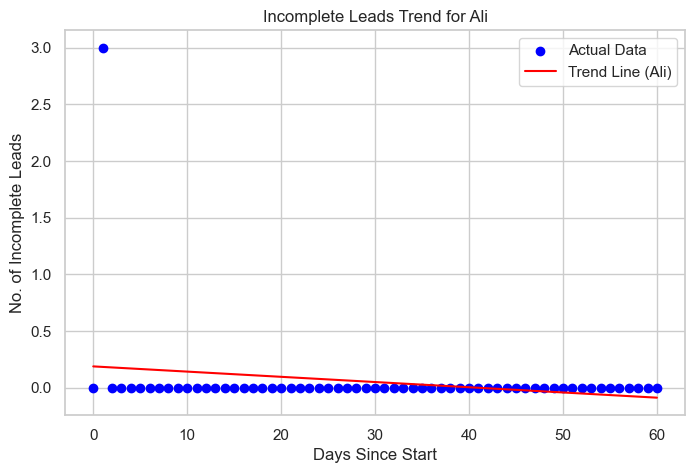

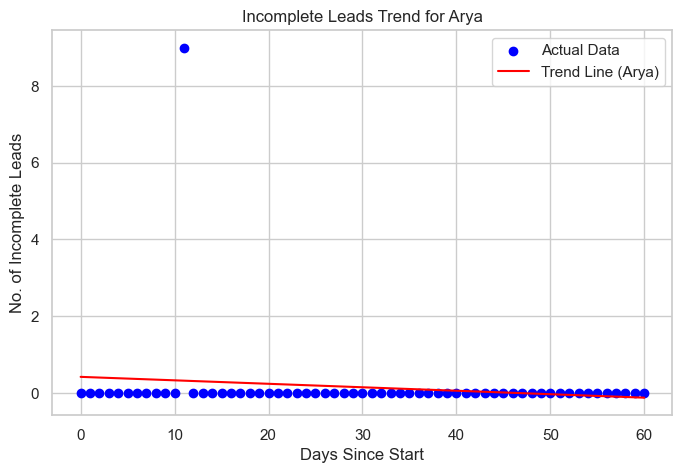

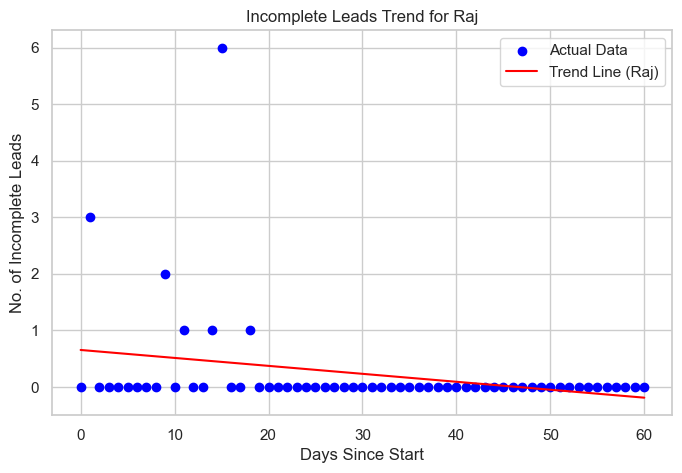

Ali: Trend - Improvement, Slope: -0.00
Arya: Trend - Improvement, Slope: -0.01
Raj: Trend - Improvement, Slope: -0.01


In [74]:

from sklearn.linear_model import LinearRegression

# Fix 1: Fill missing values in a proper way to avoid FutureWarning
df['No. of Incomplete Leads'] = df['No. of Incomplete Leads'].fillna(0)

# Fix 2: Convert Date column with correct format handling
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Drop rows where 'Date' is NaT due to parse errors
df = df.dropna(subset=['Date'])

# Convert Date to numerical value (days since the first date)
df['Days Since Start'] = (df['Date'] - df['Date'].min()).dt.days

# Initialize a LinearRegression model
model = LinearRegression()

# Prepare a dictionary to store results
trend_results = {}

# Iterate over each employee
for emp in df['Employee'].unique():
    emp_data = df[df['Employee'] == emp]

    # Prepare the data (X: days, y: number of incomplete leads)
    X = emp_data[['Days Since Start']]
    y = emp_data['No. of Incomplete Leads']

    # Fit the linear regression model
    model.fit(X, y)

    # Get the slope (coefficient) and intercept of the line
    slope = model.coef_[0]
    intercept = model.intercept_

    # Store the results
    trend_results[emp] = {'Slope': slope, 'Intercept': intercept}

    # Plot the trend line
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, label='Actual Data', color='blue')
    plt.plot(X, model.predict(X), label=f'Trend Line ({emp})', color='red')
    plt.title(f'Incomplete Leads Trend for {emp}')
    plt.xlabel('Days Since Start')
    plt.ylabel('No. of Incomplete Leads')
    plt.legend()
    plt.show()

# Display the trend results
for emp, result in trend_results.items():
    slope = result['Slope']
    trend = "Improvement" if slope < 0 else "Deterioration"
    print(f"{emp}: Trend - {trend}, Slope: {slope:.2f}")


#### Ali: Slight negative slope (-0.00) → no significant improvement; incomplete leads stayed consistently low.
#### Arya: Small negative slope (-0.01) → slight improvement early on; incomplete leads reduced and remained low.
#### Raj: Small negative slope (-0.01) → noticeable improvement in the initial days; incomplete leads dropped to zero and stayed there.

#### Conclusion: All associates show mild improvement with no significant deterioration; incomplete leads are well-controlled across the team.

### 6. Performance Consistency: Calculate the coefficient of variation (CV) for the daily leads generated by each associate. Which associate has the most consistent performance?

In [78]:
## for deeper comparison we can also use mean and coefficient of variation (CV)
# Group by Employee and calculate mean and std dev
stats_df = df.groupby('Employee')['Leads'].agg(['mean', 'std']).reset_index()

# Rename columns
stats_df.columns = ['Employee', 'Mean Leads', 'Lead Std Dev']

# Calculate Coefficient of Variation
stats_df['CV (%)'] = stats_df['Lead Std Dev'] / stats_df['Mean Leads']

# Sort by CV (descending = more variability relative to mean)
stats_df = stats_df.sort_values(by='CV (%)', ascending=False)

print(stats_df)


  Employee  Mean Leads  Lead Std Dev    CV (%)
0      Ali    8.000000      6.156298  0.769537
2      Raj    7.327869      5.596789  0.763768
1     Arya    7.770492      5.748604  0.739799


#### Arya is the most consistent performer (CV = 0.74), showing the least variation in daily leads relative to her average.

#### Ali is the least consistent (CV = 0.77), with the highest day-to-day variability.

#### Raj’s consistency is similar to Ali’s (CV = 0.76).

#### Overall, all associates show fairly similar variability, but Arya is the most steady performer.

In [86]:
import pandas as pd

# Load dataset
file_path = r"C:\Users\Dell\Downloads\Antarctica Global\Assignment\Dataset\merged_dataset.xlsx"
df = pd.read_excel(file_path)

# Create summary list
high_perf_summary = []

# Loop through each unique employee
for emp in df['Employee'].unique():
    emp_data = df[df['Employee'] == emp]
    
    # Calculate 90th percentile threshold for high-performance, [90th percentile threshold of leads (i.e., the value above which the top 10% of daily lead counts fall).]
    threshold = emp_data['Leads'].quantile(0.9)
    
    # Filter high-performance days
    high_perf_days = emp_data[emp_data['Leads'] >= threshold]
    
    # Calculate average time spent on these days
    avg_time_spent = high_perf_days['Time spent on LG (mins)'].mean()
    
    high_perf_summary.append({
        'Employee': emp,
        '90th Percentile Threshold (Leads)': threshold,
        'Avg Time on High-Performance Days (mins)': round(avg_time_spent, 2),
        'Number of High-Performance Days': len(high_perf_days)
    })

# Convert to DataFrame
summary_df = pd.DataFrame(high_perf_summary)

# Display results
print(summary_df)


  Employee  90th Percentile Threshold (Leads)  \
0      Ali                               15.0   
1     Arya                               14.0   
2      Raj                               13.0   

   Avg Time on High-Performance Days (mins)  Number of High-Performance Days  
0                                    251.43                               14  
1                                    161.43                                7  
2                                    307.14                                7  


#### Raj spent the most time on average during high-performance days, indicating deep effort per high-output day.

#### Ali had more high-performance days (14) than others, suggesting greater consistency at top levels.

#### Arya achieved high performance with the least time investment, which may reflect efficiency or different work styles.

## 7. Impact of Longer Lead Generation Time: Determine if there is a threshold in the time spent on lead generation beyond which the number of leads generated significantly increases. What is the optimal time spent on lead generation for maximizing leads?

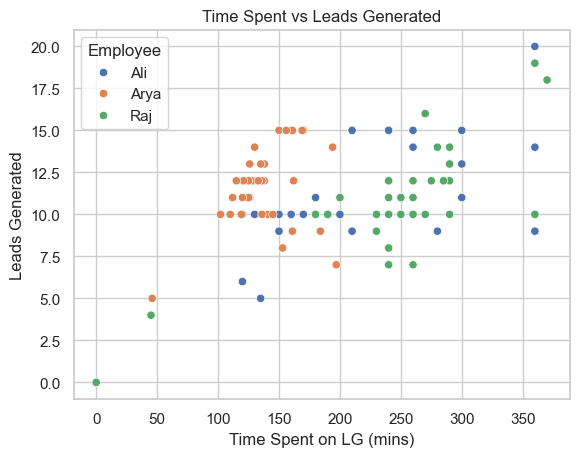

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_clean, x='Time spent on LG (mins)', y='Leads', hue='Employee')
plt.title('Time Spent vs Leads Generated')
plt.xlabel('Time Spent on LG (mins)')
plt.ylabel('Leads Generated')
plt.show()


In [93]:
df_clean['Time Bin'] = pd.cut(df_clean['Time spent on LG (mins)'], bins=[0, 100, 300, 400])
bin_summary = df_clean.groupby('Time Bin')['Leads'].mean().reset_index()
print(bin_summary)


     Time Bin      Leads
0    (0, 100]   4.500000
1  (100, 300]  11.415929
2  (300, 400]  13.750000


C:\Users\Dell\AppData\Local\Temp\ipykernel_5748\1570665472.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df_clean.groupby('Time Bin')['Leads'].mean().reset_index()


#### From the time bin table:

#### (0, 100] mins → Average leads: 4.5

#### (100, 300] mins → Average leads: 11.42

#### (300, 400] mins → Average leads: 13.75

#### This indicates a clear threshold around 100 minutes. After this point, the number of leads more than doubles.

### Using Polynomial Regression
### If the scatterplot shows non-linearity:

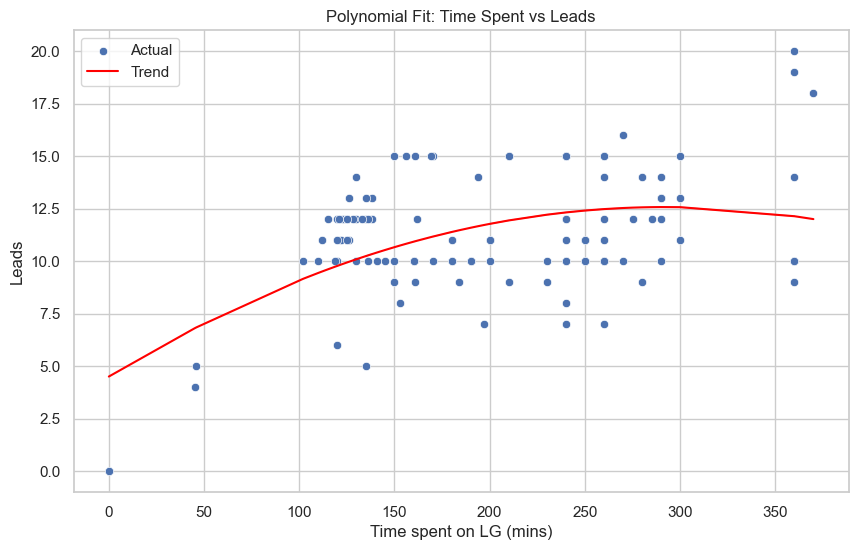

In [94]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = df_clean[['Time spent on LG (mins)']]
y = df_clean['Leads']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Predict values
df_clean['Predicted Leads'] = model.predict(X_poly)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time spent on LG (mins)', y='Leads', data=df_clean, label='Actual')
sns.lineplot(x='Time spent on LG (mins)', y='Predicted Leads', data=df_clean, color='red', label='Trend')
plt.title('Polynomial Fit: Time Spent vs Leads')
plt.show()


#### From the Polynomial Fit graph:

##### The red trend line increases steeply up to ~250–280 minutes, where it flattens and then slightly declines.

##### This indicates diminishing returns after that point.

#### Optimal Time: 250 to 300 minutes
##### Beyond 300 mins, additional time leads to marginal or no increase in leads.

##### Employees spending over 300 minutes did not consistently generate more than those in the 250–300 range.

##### - Arya tends to work efficiently in the 100–200 mins range and consistently generates 10–15 leads.

##### - Ali and Raj work more across the 200–350 mins range and generally generate 10–17 leads, but with more variability.

##### - This supports the trend that after 100 mins, increasing time can help, but there’s a plateau around 300 mins.

#### Conclusion
##### - Yes, a clear threshold exists around 100 minutes — after which lead generation improves significantly.

##### - Optimal time range for maximizing leads: 250–300 minutes

##### - Beyond 300 minutes: diminishing returns — not much gain for extra effort.

## 8. Comparative Day Analysis: Calculate the average leads generated on weekdays versus weekends for each associate. Are there any notable differences in performance based on the day of the week?

In [110]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\Dell\Downloads\Antarctica Global\Assignment\Dataset\merged_dataset.xlsx"
df = pd.read_excel(file_path)

# Define a set for weekend days
weekend_days = {'Sat', 'Sun'}

# Create a new column 'DayType' based on the 'Day' column
df['DayType'] = df['Day'].apply(lambda x: 'Weekend' if x in weekend_days else 'Weekday')

# Save the updated DataFrame back to Excel
output_path = r'C:\Users\Dell\Downloads\Antarctica Global\Assignment\Dataset\merged_dataset.xlsx'
df.to_excel(output_path, index=False)

print("File saved successfully at:", output_path)


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Dell\\Downloads\\Antarctica Global\\Assignment\\Dataset\\merged_dataset.xlsx'

In [114]:
import pandas as pd

# Load updated dataset
file_path = r"C:\Users\Dell\Downloads\Antarctica Global\Assignment\Dataset\merged_dataset.xlsx"
df = pd.read_excel(file_path)

# Group by Employee and DayType to calculate average, count, and total leads
summary_df = df.groupby(['Employee', 'DayType']).agg(
    Avg_Leads=('Leads', 'mean'),
    Days_Count=('Leads', 'count'),
    Total_Leads=('Leads', 'sum')
).reset_index()

# Pivot to wide format for each metric
pivot_avg = summary_df.pivot(index='Employee', columns='DayType', values='Avg_Leads').add_prefix('Avg Leads - ')
pivot_days = summary_df.pivot(index='Employee', columns='DayType', values='Days_Count').add_prefix('Days Count - ')
pivot_total = summary_df.pivot(index='Employee', columns='DayType', values='Total_Leads').add_prefix('Total Leads - ')

# Combine all metrics into a final summary table
final_summary = pd.concat([pivot_avg, pivot_days, pivot_total], axis=1).reset_index()

# Round average leads to 2 decimals
final_summary = final_summary.round(2)

# Display the result
print("Comparative Day Analysis Summary:")
print(final_summary)


Comparative Day Analysis Summary:
DayType Employee  Avg Leads - Weekday  Avg Leads - Weekend  \
0            Ali                10.84                  0.0   
1           Arya                10.53                  0.0   
2            Raj                 9.58                  1.0   

DayType  Days Count - Weekday  Days Count - Weekend  Total Leads - Weekday  \
0                          45                    16                    488   
1                          45                    16                    474   
2                          45                    16                    431   

DayType  Total Leads - Weekend  
0                            0  
1                            0  
2                           16  


### Comparative Day Analysis:

##### Ali and Arya generated an average of 10.84 and 10.53 leads on weekdays respectively, but 0 leads on weekends, showing they were not productive or possibly inactive during weekends.

##### Raj generated an average of 9.58 leads on weekdays and 1.0 lead on weekends, showing some weekend activity but with significantly lower output.

##### Each associate had 45 weekdays and 16 weekend days. Total lead generation on weekends was negligible for all, especially zero for Ali and Arya.

### Conclusion:
##### All associates perform significantly better on weekdays, with minimal to no output on weekends, indicating that lead generation is primarily a weekday activity.

## 9. Predictive Analysis: Using a simple linear regression model, predict the number of leads each associate is expected to generate based on their time spent on lead generation. How accurate is the model when compared to actual data?


--- Ali ---
R² Score: 0.83
Mean Squared Error: 6.34


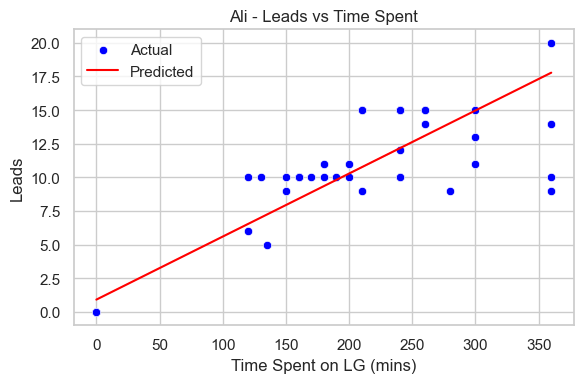


--- Arya ---
R² Score: 0.87
Mean Squared Error: 4.19


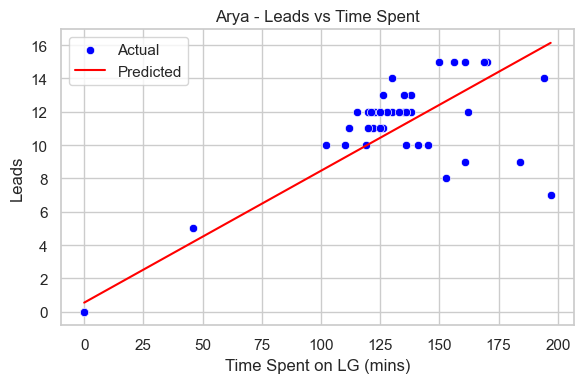


--- Raj ---
R² Score: 0.91
Mean Squared Error: 2.92


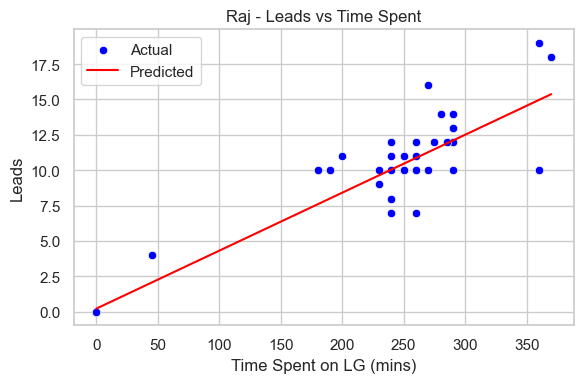

In [115]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = r"C:\Users\Dell\Downloads\Antarctica Global\Assignment\Dataset\merged_dataset.xlsx"
df = pd.read_excel(file_path)

# Drop rows with missing values in key columns
df = df.dropna(subset=['Leads', 'Time spent on LG (mins)'])

# Function to fit and evaluate model for each employee
def evaluate_model(employee_df, employee_name):
    X = employee_df[['Time spent on LG (mins)']]
    y = employee_df['Leads']
    
    # Train linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict
    y_pred = model.predict(X)
    
    # Evaluation metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    print(f"\n--- {employee_name} ---")
    print(f"R² Score: {r2:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    
    # Plot actual vs predicted
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=X['Time spent on LG (mins)'], y=y, color='blue', label='Actual')
    sns.lineplot(x=X['Time spent on LG (mins)'], y=y_pred, color='red', label='Predicted')
    plt.title(f'{employee_name} - Leads vs Time Spent')
    plt.xlabel('Time Spent on LG (mins)')
    plt.ylabel('Leads')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return model, r2, mse

# Run analysis for each associate
for employee in df['Employee'].unique():
    emp_df = df[df['Employee'] == employee]
    evaluate_model(emp_df, employee)
